<a href="https://colab.research.google.com/github/sundarjhu/Astrostatistics2025/blob/main/Lesson16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Box plot: comparing magnitude distributions of globular clusters

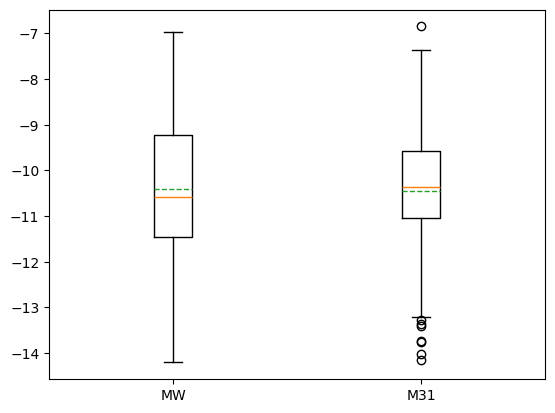

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/MW_GCs.txt')
data2 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/M31_GCs.txt')
#M31 magnitudes not corrected for distance!
data2 = data2 - 24.9

_ = plt.boxplot([data1, data2], tick_labels=['MW', 'M31'], meanline=True, showmeans=True)

### If not provided, the default whisker locations are at $Q_{_1} - 1.5\times {\rm IQR}$ and $Q_{_3} + 1.5\times {\rm IQR}$.

### Note the actual location of the "fences" are determined by <font color="orange">the most extreme data values that are still inside the fence</font>.

In [ ]:
q1, q2, q3 = np.percentile(data1, [25, 50, 75])
iqr = q3 - q1
print(f"q1, q3, IQR = {q1:.3f}, {q3:.3f}, {iqr:.3f}")
print(f"Lower whisker for MW: {q1 - 1.5 * iqr:.3f}")
print(f"Upper whisker for MW: {q3 + 1.5 * iqr:.3f}")

q1, q3, IQR = -11.463, -9.225, 2.238
Lower whisker for MW: -14.820
Upper whisker for MW: -5.867


## Let's create a violin plot with the same data

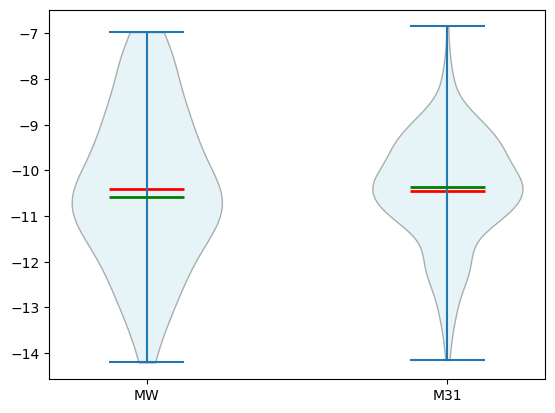

In [ ]:
fig, ax = plt.subplots()
vplot = ax.violinplot([data1, data2], showmeans=True, showmedians=True, bw_method='scott', points=100)
for body in vplot['bodies']:
  body.set_facecolor('lightblue')
  body.set_edgecolor('black')

vplot['cmeans'].set_color('red')
vplot['cmeans'].set_linewidth(2)
vplot['cmedians'].set_color('green')
vplot['cmedians'].set_linewidth(2)

ax.set_xticks([1, 2])
_ = ax.set_xticklabels(['MW', 'M31'])

### The limits of the "violin" are the actual extreme values of the data.

# Histogram: comparing classical and Bayesian binning methods

In [ ]:
import numpy as np

#Our data is a mixture of two Gaussians
from scipy.stats import bernoulli, norm
np.random.seed(seed)
p = bernoulli.rvs(0.5, size = 1000)
np.random.seed(seed)
data = p * norm.rvs(size = 1000) + (1 - p) * norm.rvs(loc = 2, scale = 0.5, size = 1000)

#The histograms are computed using the astropy.stats.histogram package
from astropy.stats import histogram
out = histogram(data, bins = 'scott', density = True) #returns a tuple
n_f = out[0]; bin_edges_f = out[1]
out = histogram(data, bins = 'knuth', density = True) #returns a tuple
n_k = out[0]; bin_edges_k = out[1]
out = histogram(data, bins = 'blocks', density = True) #returns a tuple
n_b = out[0]; bin_edges_b = out[1]

from matplotlib import pyplot as plt
x = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
_ = ax[0].plot(x, 0.5 * norm.pdf(x) + 0.5 * norm.pdf(x, loc = 2, scale = 0.5), alpha = 0.7, label = 'True PDF')
_ = ax[0].plot(bin_edges_f[1:], n_f, drawstyle = 'steps', alpha = 0.5, label = 'Scott')
_ = ax[0].plot(bin_edges_k[1:], n_k, drawstyle = 'steps', lw = 3, label = 'Knuth')
_ = ax[0].legend(loc = 'best')

_ = ax[1].plot(x, 0.5 * norm.pdf(x) + 0.5 * norm.pdf(x, loc = 2, scale = 0.5), alpha = 0.7, label = 'True PDF')
_ = ax[1].plot(bin_edges_f[1:], n_f, drawstyle = 'steps', alpha = 0.5, label = 'Scott')
_ = ax[1].plot(bin_edges_b[1:], n_b, drawstyle = 'steps', lw = 3, label = 'Bayesian Blocks')
_ = ax[1].legend(loc = 'best')